In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('tips (data for regression problem).csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [62]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [63]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [65]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

# EDA on Tips data

In [66]:
df_days = df.groupby('day')['total_bill'].sum()
df_days

,total_bill
day,
Fri,325.88
Sat,1778.40
Sun,1627.16
Thur,1096.33


Text(0.5, 1.0, 'Bar Chart: Average Tip vs Time')

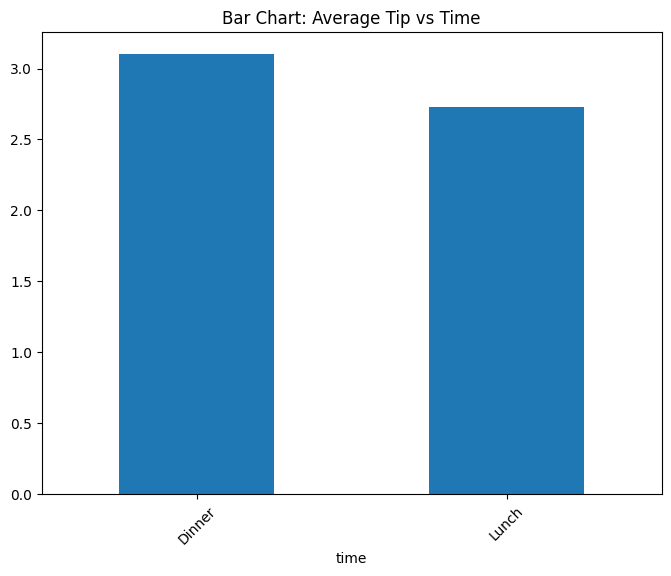

In [67]:
# average tip vs time bar chart
plt.figure(figsize=(8, 6))
df.groupby('time')['tip'].mean().plot(kind='bar', rot=45)
plt.title('Bar Chart: Average Tip vs Time')

Text(0, 0.5, 'Total Bill Amount')

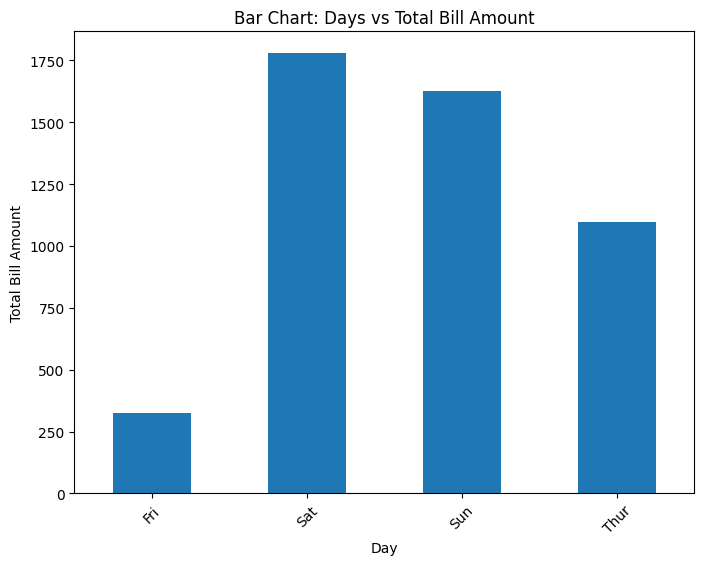

In [68]:
# bar chart of days vs total_bill amount
plt.figure(figsize=(8, 6))
df_days.plot(kind='bar', rot=45)
plt.title('Bar Chart: Days vs Total Bill Amount')
plt.xlabel('Day')
plt.ylabel('Total Bill Amount')

The above bar plot shows us that:
1. People spend more on weekends i.e, (Sat, Sun)
2. Sat being the highest spending day followed by Sun

Text(0, 0.5, 'Tip')

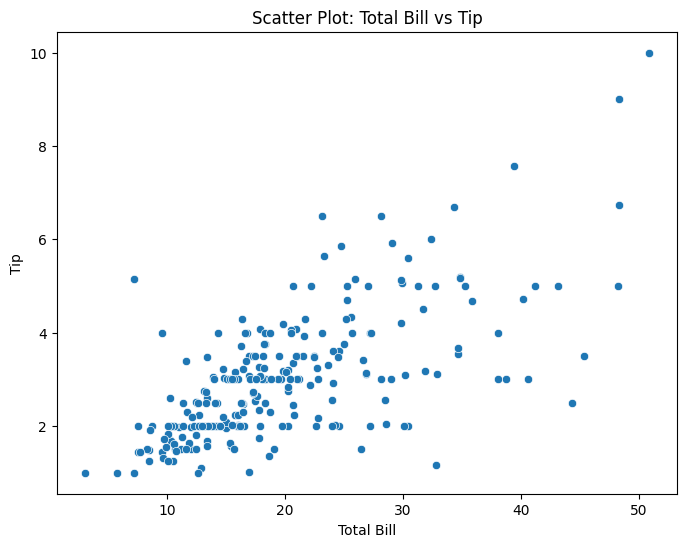

In [69]:
# total amount vs tips
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

The Scatter plot shows an linear relationship of total bill and tip i.e, if the bill amount is more than tips will also be more

Text(0, 0.5, 'Total Bill')

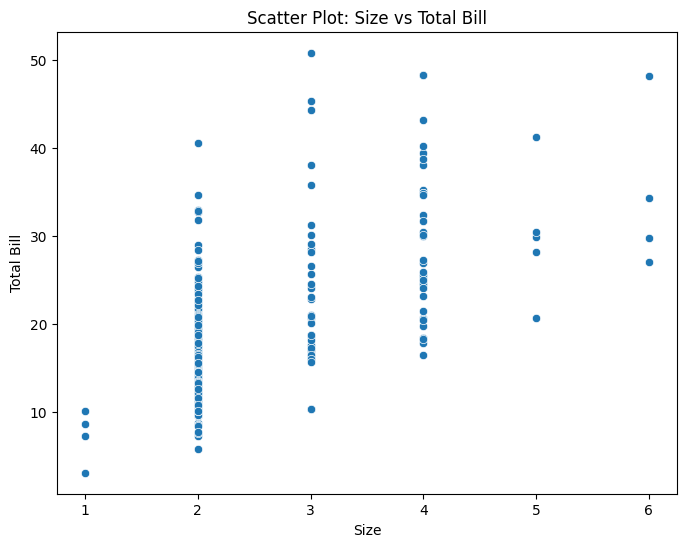

In [70]:
# size vs total bill
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='size', y='total_bill')
plt.title('Scatter Plot: Size vs Total Bill')
plt.xlabel('Size')
plt.ylabel('Total Bill')

as the number of people on the table increases, total bill also increases and hence the total tips also increases

Text(0, 0.5, 'Frequency')

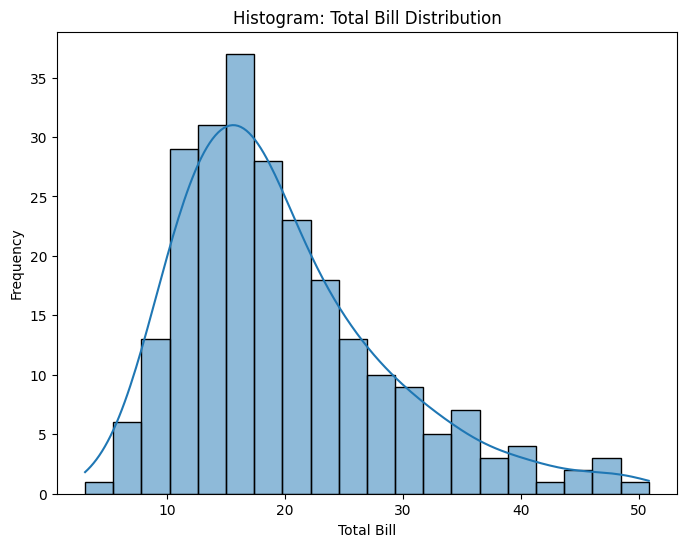

In [71]:
# distribution of total_bill amount
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='total_bill', bins=20, kde=True)
plt.title('Histogram: Total Bill Distribution')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')

Text(0, 0.5, '')

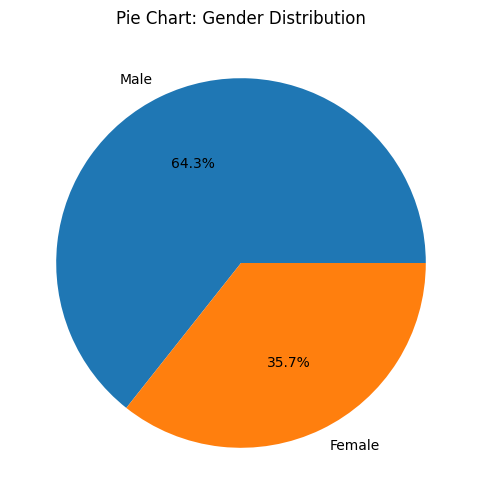

In [72]:
# male female pie chart
plt.figure(figsize=(8, 6))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart: Gender Distribution')
plt.ylabel('')

In [73]:
# average tips of male vs female spend analysis
df_sex = df.groupby('sex')['tip'].mean()
df_sex

,tip
sex,
Female,2.833448
Male,3.089618


above pie chart shows that even though male ratio are more, but the tipping amount is almost the same

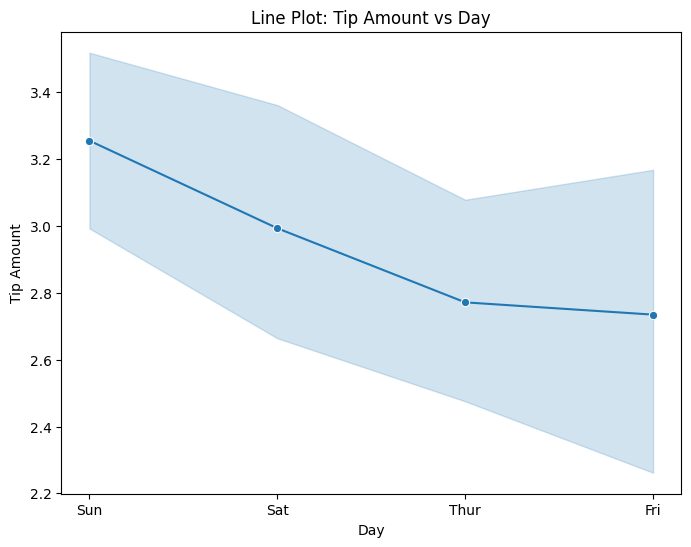

In [74]:
# Line plot of tip amounts by day or time (if time-series data is available)
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='day', y='tip', marker='o')
plt.title('Line Plot: Tip Amount vs Day')
plt.xlabel('Day')
plt.ylabel('Tip Amount')
plt.show()


The above line plot shows us that, average tips are more on weekends

In [75]:
# average tips of smoker and non smoker
df_smoker = df.groupby('smoker')['tip'].mean()
df_smoker

,tip
smoker,
No,2.991854
Yes,3.008710


smoker and non-smoker tips almost same

# Factors that significantly impact tip amount

      Feature  Importance
0  total_bill    0.904029
1        size    0.095971


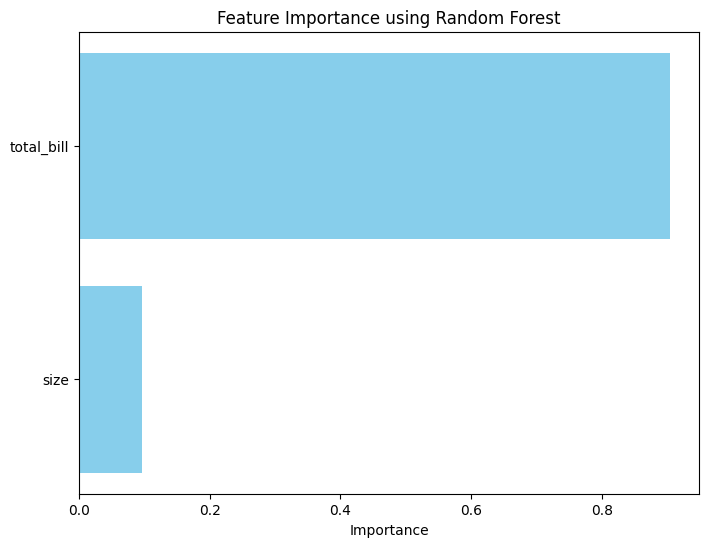

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df[['total_bill', 'size']]
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()
plt.show()


# convert categorical data to numeric data using label encoding

In [77]:
from sklearn.preprocessing import LabelEncoder

le_dic = {}

encoded_df = df.copy()

for columns in df.columns:
    if df[columns].dtypes == 'object':
        le = LabelEncoder()
        encoded_df[columns] = le.fit_transform(df[columns])
        le_dic[columns] = le


encoded_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [78]:
# to reverse label encoding
'''
a = le_dic['day'].inverse_transform(encoded_df['day'])
a
'''

"\na = le_dic['day'].inverse_transform(encoded_df['day'])\na\n"

# Training and test split

In [79]:
from sklearn.model_selection import train_test_split

X = encoded_df.drop('total_bill', axis=1)
y = encoded_df['total_bill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Regression techniques and prediction accuracy

In [80]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Linear regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear regression - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

Linear regression - MAE: 4.360427585042624, RMSE: 5.574663603104529, R²: 0.6334779105328128


# ridge regression

In [82]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge regression - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

Ridge regression - MAE: 4.354050458884731, RMSE: 5.571074064512764, R²: 0.6339497673855486


# lasso Regression

In [83]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Lasso regression - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

Lasso regression - MAE: 4.567528846424708, RMSE: 5.853571731478564, R²: 0.595885240819777


# decision tree regression

In [84]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision tree regression - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

Decision tree regression - MAE: 4.511326530612245, RMSE: 6.640998549517525, R²: 0.4798488134683625


# random forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest regression - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

Random Forest regression - MAE: 4.545253335762877, RMSE: 6.451882502928755, R²: 0.5090517433458599


# Support Vector Regression (SVR)

In [86]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"SVR regression - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

SVR regression - MAE: 4.50892511954474, RMSE: 6.239132683066228, R²: 0.5408957999745818


# K - Nearest Neighbour (K-NN) Regression

In [87]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"KNN regression - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

KNN regression - MAE: 4.743102040816326, RMSE: 6.510207307273208, R²: 0.5001353105715218


# Insights for Management

Primary Insight: Bill Amount
Bill_amount feature has the highest importance in the model, this suggests that the total amount a customer spends is the most significant predictor of the tip amount.
1. Encourage Larger Orders
2. Promotions and Combo Deals

Secondary Insight: Size of the Party
size (number of people in the group) shows moderate importance, it indicates that larger parties tend to leave higher tips.
1. Focus on Group Bookings
2. Provide Incentives for Large Groups

Other Potential Factors: Time, Day, and Demographics
1. Targeted Promotions Based on Time of Day: If tips are higher during dinner hours (typically associated with larger bills), consider implementing promotions to encourage higher spending during off-peak hours (e.g., lunch). For instance, offer discounts or "early bird" specials.
2. Happy Hour Promotions: If time and day influence tips significantly (e.g., Friday or Saturday evenings), use targeted marketing

# Check linear Trend using different plots

# Scatter plot

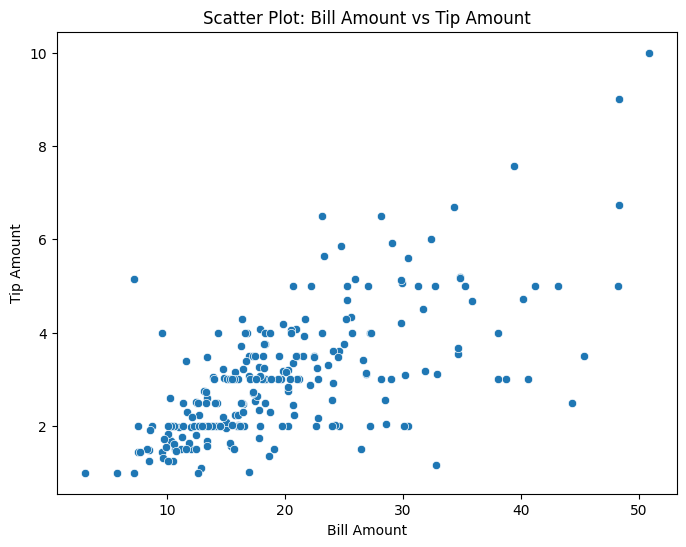

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between bill_amount and tip_amount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Scatter Plot: Bill Amount vs Tip Amount')
plt.xlabel('Bill Amount')
plt.ylabel('Tip Amount')
plt.show()


# Pair-plots

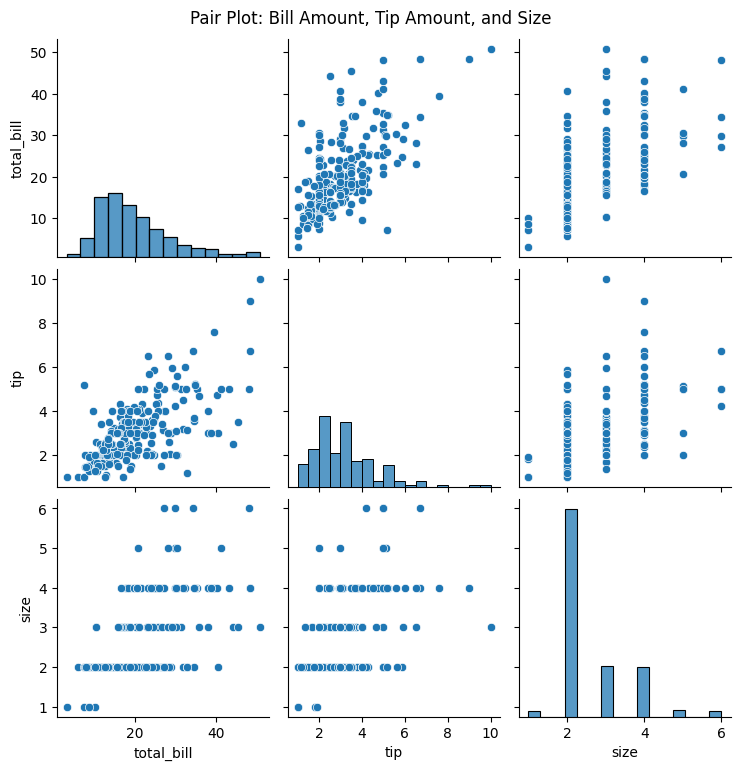

In [89]:
sns.pairplot(df[['total_bill', 'tip', 'size']])
plt.suptitle("Pair Plot: Bill Amount, Tip Amount, and Size", y=1.02)
plt.show()


# correlation matrix

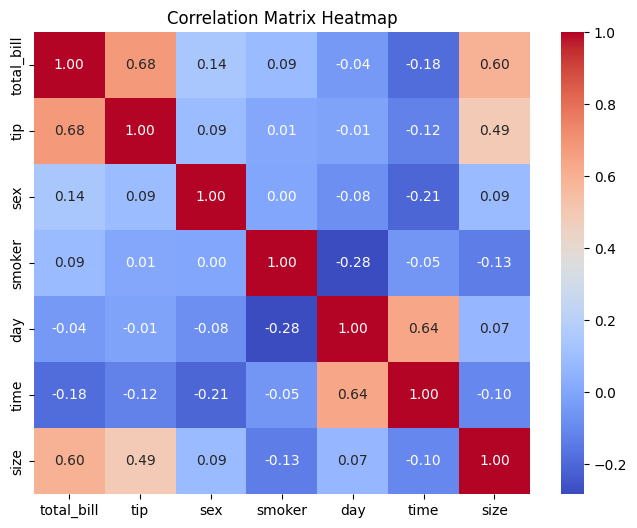

In [90]:
# Compute correlation matrix
corr_matrix = encoded_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


correlation matrix also shows that total_bill and tip has highest correlation followed by size vs tips

# Statistical Tests for Linearity (Rainbow Test)

In [91]:
import statsmodels.api as sm
# statsmodels.stats.diagnostic import rainbow
from statsmodels.stats.diagnostic import linear_rainbow

# Prepare data for the linear regression model
X = df[['total_bill', 'size']]  # Select numeric predictors for simplicity
y = df['tip']

# Add constant (intercept) to the predictors
X = sm.add_constant(X)

# Fit an OLS model
model = sm.OLS(y, X).fit()

# Perform Rainbow Test
rainbow_test = linear_rainbow(model)
print(f"Rainbow test p-value: {rainbow_test[1]}")


Rainbow test p-value: 0.17048935693447634


# Residuals Plot

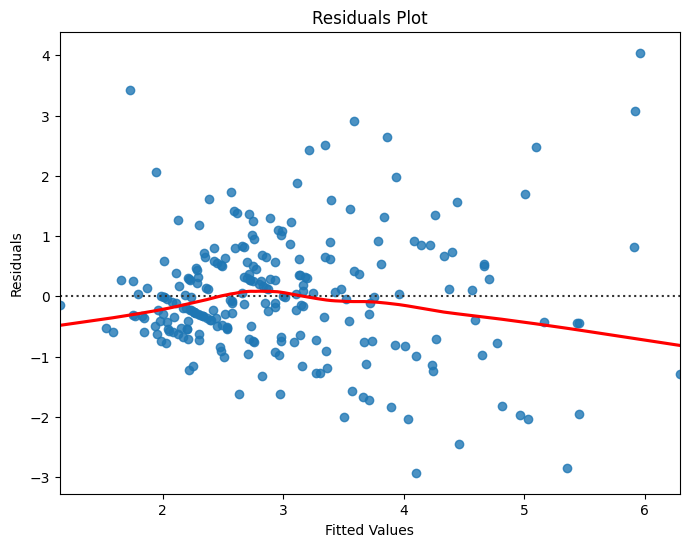

In [92]:
# Fit a simple Linear Regression model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X[['total_bill', 'size']], y)  # Fit model with 'bill_amount' and 'size' as features

# Get predictions and residuals
y_pred = linear_model.predict(X[['total_bill', 'size']])
residuals = y - y_pred

# Residuals plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


# Line Plot (For Time-Series Data)

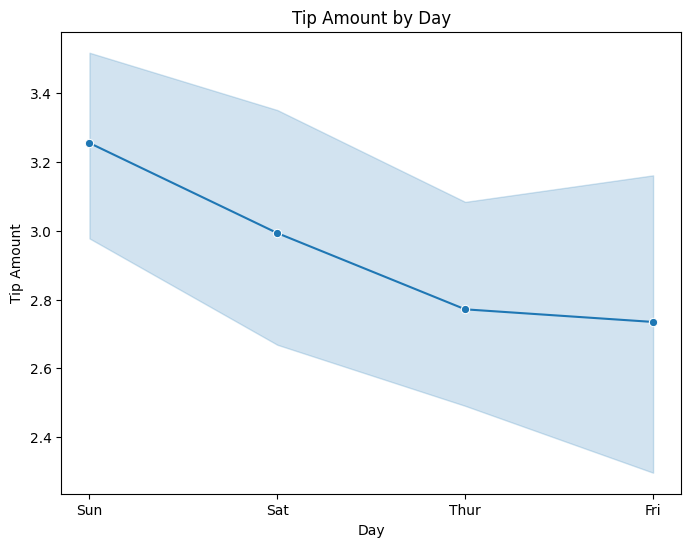

In [93]:
# Line plot by day (if 'day' is categorical and has a time-related structure)
plt.figure(figsize=(8, 6))
sns.lineplot(x='day', y='tip', data=df, marker='o')
plt.title('Tip Amount by Day')
plt.xlabel('Day')
plt.ylabel('Tip Amount')
plt.show()

The above line plot shows us that:
1. People spend more on weekends i.e, (Sat, Sun)
2. Sat being the highest spending day followed by Sun